In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.ipynb
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.jpg
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_01.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_02.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_03.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_04.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_05.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_06.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_07.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_08.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_09.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_10.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_11.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_12.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_13.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_14.

In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
# Ephemeris
BJD0 = 2448773.21461 - 2400000
dBJD0 = 0.00009
P0 = 0.0623628426
dP0 = 0.0000000006

In [5]:
# Calculate the Epoch
Epoch = (BJD_time - BJD0)/P0
#print(E)

x = BJD_time
y = OC
dy = OC_err

len_x = len(x)

### Sinusoidal fitting

In [6]:
m = 0
c = 0
A = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36           #rad

In [7]:
def sin_fit(x,m,c,A,b,w):
    Epoch = (x-BJD0)/P0
    return m*x + c + A*np.sin(b*x + w)

In [8]:
import scipy.optimize as optimization  
guess = (m,c,A,b,w)
params, params_covariance = optimization.curve_fit(sin_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

In [9]:
m = params[0]
c = params[1]
A = params[2]
b = params[3]
w = params[4]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dA = params_covariance[2,2]
db = params_covariance[3,3]
dw = params_covariance[4,4]

oc_sin_fit = sin_fit(x,*params)

In [10]:
##T
T = c/(24*60*60) + BJD0 + 2400000
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print(P)
#print(dP)

#Period of 3rd
P = 2*np.pi/b
dP = (1/b**2)*(2*np.pi)*(db)

print("The Keplerian parameters:")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("dP =", m, "+/-", dm**0.5, "[s]")
print("dT0 =", c, "+/-", dc**0.5, "[s]")
print("T0 =", T, "+/-", dT, "[days]")
print("P_bin =", Period, "+/-", dPeriod, "[days]")
print("K =", A, "+/-", dA**0.5, "[s]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("P_d =", P, "+/-", dP**0.5, "[days]")
print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

The Keplerian parameters:
m = 0.004138079235259238 +/- 0.0002398625719465801 [s]
c = -186.70095580588603 +/- 12.046762617617524 [s]
dP = 0.004138079235259238 +/- 0.0002398625719465801 [s]
dT0 = -186.70095580588603 +/- 12.046762617617524 [s]
T0 = 2448773.2124491096 +/- 0.00016595408753286922 [days]
P_bin = 0.062362890494435594 +/- 2.840284357655517e-09 [days]
K = 44.29468501355703 +/- 0.9131633085619654 [s]
b = 0.0005247945805387933 +/- 7.2546849136895034e-06 [rad]
P_d = 11972.656616859113 +/- 0.03465126928239845 [days]
P_yr = 32.77934734253008 +/- 9.4870004879941e-05 [years]
w = -4.248749448213725 +/- 0.36323243789248993 [rad]
w_deg = -243.43541159118377 +/- 20.81168567348747 [deg]


In [11]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = sin_fit(x_line, *params) #### For all interporation 
#print(y)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - oc_sin_fit)**2/(dy)**2)/dof
Reduced_chisq_sin = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_sin)

Reduced_chisq: 0.17805659289748624


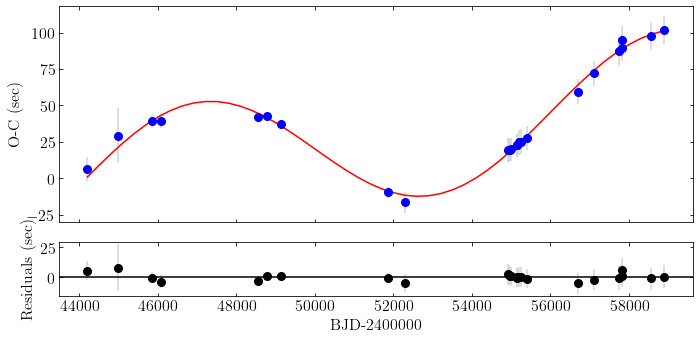

In [12]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_sin_fit = y-oc_sin_fit

ax1.errorbar(x, Res_sin_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [13]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = sin_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_sin_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [14]:
InputFile_out = "interporate_sin_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_sin = Data_out[:,1]
y_range_sin = Data_out[:,2]

#print(y_range)

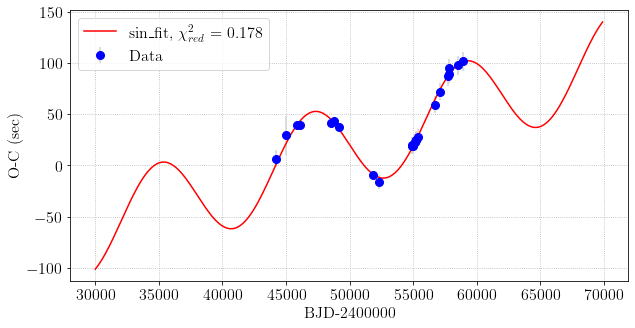

In [15]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_range_sin, y_range_sin, '-', color='red',label='sin\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_sin)))
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_sin_fit.pdf", dpi=1200)
plt.show()

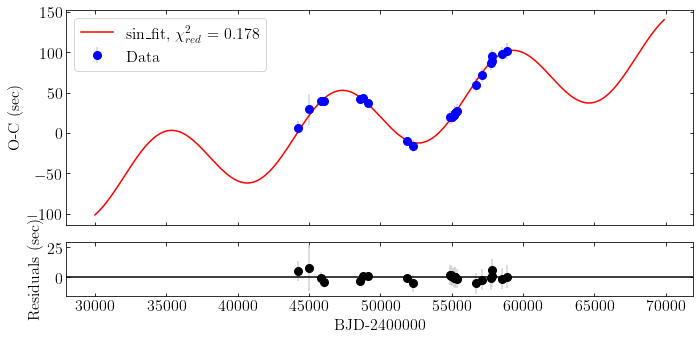

In [16]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range_sin, y_range_sin, '-', color='red',label='sin\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_sin)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Res_oc_fit = y-oc_sin_fit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Res_sin_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_sin_fit_res.pdf", dpi=1200)

plt.show()

### LTT fitiing

In [17]:
m = 0
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days

In [18]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [19]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [20]:
def LTT_fit(t,m,c,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    return m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [21]:
import scipy.optimize as optimization  
guess = (m,c,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

In [22]:
m = params[0]
c = params[1]
K = params[2]
P = params[3]
e = params[4]
w = params[5]
tau = params[6]


dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
dP = params_covariance[3,3]
de = params_covariance[4,4]
dw = params_covariance[5,5]
dtau = params_covariance[6,6]


oc_LTT_fit = LTT_fit(x,m,c,K,P,e,w,tau)
#print(ocfit)


if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
#    print(K,P,e,w,w_deg,tau)


##T
T = c/(24*60*60) + BJD0 + 2400000
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print(P)
#print(dP)

print("The Keplerian parameters:")
print("dP =", m, "+/-", dm**0.5, "[s]")
print("dT0 =", c, "+/-", dc**0.5, "[s]")
print("T0 =", T, "+/-", dT, "[days]")
print("P_bin =", Period, "+/-", dPeriod, "[days]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("P_d =", P, "+/-", dP**0.5, "[days]")
print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
print("e =", e, "+/-", de**0.5, "[-]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
print("tau =", tau, "+/-", dtau**0.5, "[days]")

The Keplerian parameters:
dP = 0.0003033322755291173 +/- 2.148813666501042e-05 [s]
dT0 = 2.3894556206004016 +/- 4.688595335686989 [s]
T0 = 2448773.2146376558 +/- 0.00010509431480951502 [days]
P_bin = 0.06236284611079023 +/- 6.49503132419722e-10 [days]
K = 46.237029098437645 +/- 1.070281651039475 [s]
P_d = 12722.064297507894 +/- 349.05711670906857 [days]
P_yr = 34.831113750877186 +/- 0.9556663017359851 [years]
e = 0.1790198881216013 +/- 0.057516820489614415 [-]
w = -1.8719906046419388 +/- 0.29429792419591105 [rad]
w_deg = -107.25716093412619 +/- 16.862028975886734 [deg]
tau = 52543.673656869 +/- 576.2731076899223 [days]


In [23]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_LTT_fit)**2/(dy)**2)/dof
Reduced_chisq_LTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_LTT)

Reduced_chisq: 0.10946976889128932


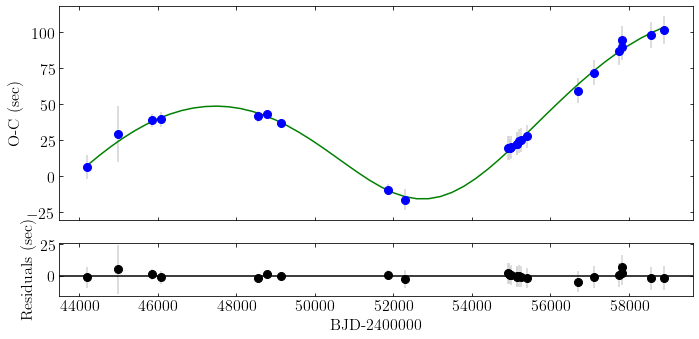

In [24]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_LTT_fit = y-oc_LTT_fit

ax1.errorbar(x, Res_LTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [25]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = LTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_LTT_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [26]:
InputFile_out = "interporate_LTT_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_LTT = Data_out[:,1]
y_range_LTT = Data_out[:,2]

#print(y_range)

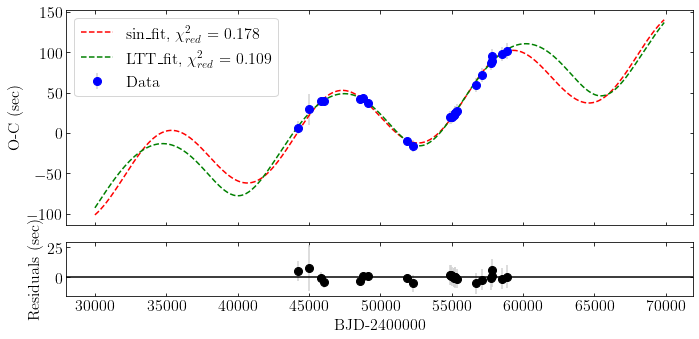

In [27]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range_sin, y_range_sin, '--', color='red',label='sin\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_sin)))
ax0.plot(x_range_LTT, y_range_LTT, '--', color='green',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_LTT)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Res_oc_fit = y-oc_sin_fit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Res_sin_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_sin_fit_res.pdf", dpi=1200)

plt.show()

### Quadratic term

In [28]:
def quadratic_fit(t,m,c,Q):
    Epoch = (t-BJD0)/P0
    return m*Epoch + c + Q*Epoch*Epoch

In [30]:
m = 0
c = 0
Q = 0
guess = (m,c,Q)

import scipy.optimize as optimization  
params, params_covariance = optimization.curve_fit(quadratic_fit, x, y,sigma=dy, absolute_sigma=False, p0 = guess)

In [31]:
m = params[0]
c = params[1]
Q = params[2]


dm = params_covariance[0,0]
dc = params_covariance[1,1]
dQ = params_covariance[2,2]


oc_quadratic_fit = quadratic_fit(x,m,c,Q)
#print(ocfit)

##T
T = c/(24*60*60) + BJD0 + 2400000
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print(P)
#print(dP)

#Period decrease
P_dot = 2*Q/(P0*24*60*60)
#print(P_dot)

dP_dot = 2*Q*(dP0*24*60*60)/((P0*24*60*60)**2)
#print(dP_dot)


print("The Keplerian parameters:")
print("dP =", m, "+/-", dm**0.5, "[s]")
print("dT0 =", c, "+/-", dc**0.5, "[s]")
print("T0 =", T, "+/-", dT, "[days]")
print("P_bin =", Period, "+/-", dPeriod, "[days]")
print("P_dot =", P_dot, "+/-", dP_dot, "[s]")

The Keplerian parameters:
dP = -0.00030341749437894777 +/- 0.00013625445997257523 [s]
dT0 = 25.695828984811023 +/- 5.269071523753593 [s]
T0 = 2448773.2149074054 +/- 0.00010871579636260323 [days]
P_bin = 0.062362839088223446 +/- 1.6873024616390447e-09 [days]
P_dot = 1.4868576435073134e-12 +/- 1.430522646035362e-20 [s]


In [32]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = quadratic_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

#Reduced_chisqrt
n = 3
dof = len_x - n
Chi_sqr = ((y - oc_quadratic_fit)**2/(dy)**2)/dof
Reduced_chisq_quadratic = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_quadratic)

Reduced_chisq: 13.55902488587432


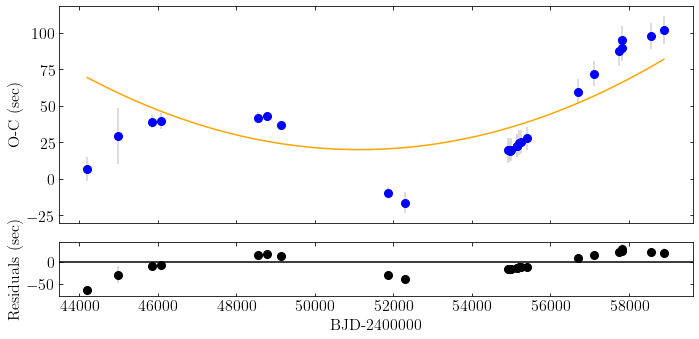

In [33]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='orange')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_quadratic_fit = y-oc_quadratic_fit

ax1.errorbar(x, Res_quadratic_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [34]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = quadratic_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_quadratic_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [35]:
InputFile_out = "interporate_quadratic_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_quadratic = Data_out[:,1]
y_range_quadratic = Data_out[:,2]

#print(y_range)

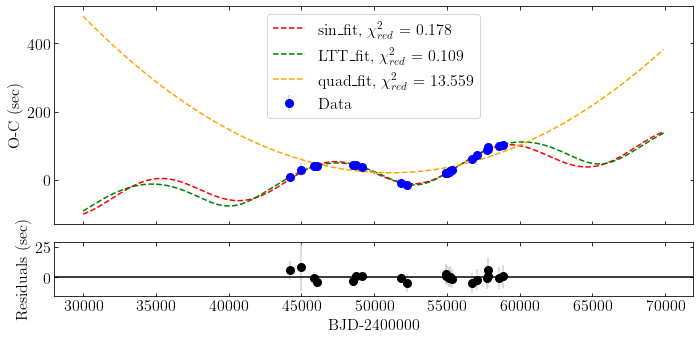

In [36]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range_sin, y_range_sin, '--', color='red',label='sin\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_sin)))
ax0.plot(x_range_LTT, y_range_LTT, '--', color='green',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_LTT)))
ax0.plot(x_range_quadratic, y_range_quadratic, '--', color='orange',label='quad\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_quadratic)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Res_oc_fit = y-oc_sin_fit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Res_sin_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_sin_fit_res.pdf", dpi=1200)

plt.show()

### Quadratic + LTT terms

In [37]:
m = 0
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days
Q = 0

In [38]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [39]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [41]:
def quadLTT_fit(t,m,c,Q,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    return m*Epoch + c + Q*Epoch*Epoch + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [43]:
import scipy.optimize as optimization  
guess = (m,c,Q,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(quadLTT_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

In [46]:
m = params[0]
c = params[1]
Q = params[2]
K = params[3]
P = params[4]
e = params[5]
w = params[6]
tau = params[7]


dm = params_covariance[0,0]
dc = params_covariance[1,1]
dQ = params_covariance[2,2]
dK = params_covariance[3,3]
dP = params_covariance[4,4]
de = params_covariance[5,5]
dw = params_covariance[6,6]
dtau = params_covariance[7,7]


oc_quadLTT_fit = quadLTT_fit(x,m,c,Q,K,P,e,w,tau)
#print(ocfit)


if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
#    print(K,P,e,w,w_deg,tau)


##T
T = c/(24*60*60) + BJD0 + 2400000
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print(P)
#print(dP)

#Period decrease
P_dot = 2*Q/(P0*24*60*60)
#print(P_dot)

dP_dot = 2*Q*(dP0*24*60*60)/((P0*24*60*60)**2)
#print(dP_dot)

print("The Keplerian parameters:")
print("dP =", m, "+/-", dm**0.5, "[s]")
print("dT0 =", c, "+/-", dc**0.5, "[s]")
print("T0 =", T, "+/-", dT, "[days]")
print("P_bin =", Period, "+/-", dPeriod, "[days]")
print("P_dot =", P_dot, "+/-", dP_dot, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("P_d =", P, "+/-", dP**0.5, "[days]")
print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
print("e =", e, "+/-", de**0.5, "[-]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
print("tau =", tau, "+/-", dtau**0.5, "[days]")

The Keplerian parameters:
dP = 0.0005093296515545295 +/- 0.0013174246352517952 [s]
dT0 = -1.8447089367290657 +/- 22.844926052202478 [s]
T0 = 2448773.2145886496 +/- 0.0002793063704998765 [days]
P_bin = 0.062362848495019114 +/- 1.5259770599185153e-08 [days]
P_dot = -5.108511865753962e-13 +/- -4.914957355475609e-21 [s]
K = 54.87871311028626 +/- 60.5209328533477 [s]
P_d = 14201.042547433033 +/- 10296.192798371676 [days]
P_yr = 38.880335516585994 +/- 28.189439557485766 [years]
e = 0.23463984972736487 +/- 0.31242363757128266 [-]
w = -1.8174797344283262 +/- 0.3271444414780259 [rad]
w_deg = -104.1339181333008 +/- 18.743995787855436 [deg]
tau = 52646.05200306689 +/- 625.5229651152141 [days]


In [48]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = quadLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

#Reduced_chisqrt
n = 8
dof = len_x - n
Chi_sqr = ((y - oc_quadLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_quadLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_quadLTT)

Reduced_chisq: 0.115086859179028


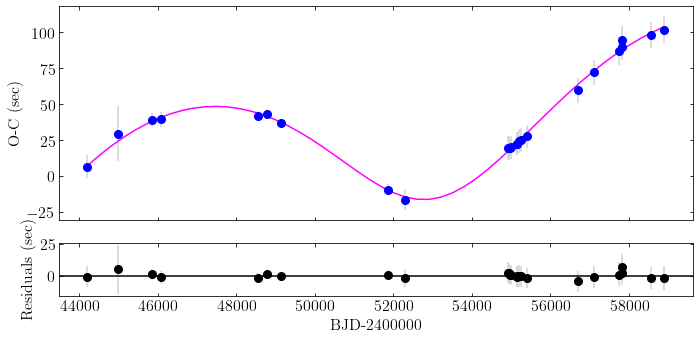

In [50]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='magenta')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_quadLTT_fit = y-oc_quadLTT_fit

ax1.errorbar(x, Res_quadLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [51]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = quadLTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_quadLTT_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [52]:
InputFile_out = "interporate_quadLTT_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_quadLTT = Data_out[:,1]
y_range_quadLTT = Data_out[:,2]

#print(y_range)

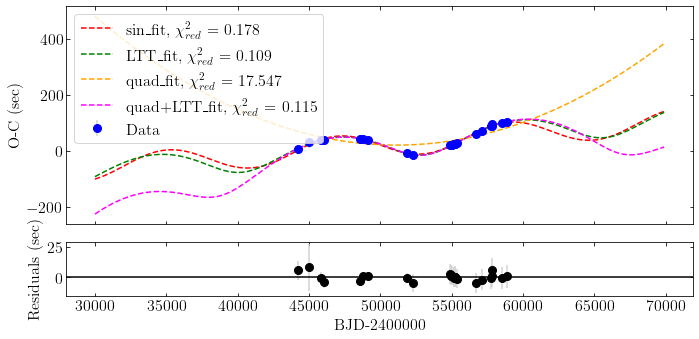

In [54]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range_sin, y_range_sin, '--', color='red',label='sin\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_sin)))
ax0.plot(x_range_LTT, y_range_LTT, '--', color='green',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_LTT)))
ax0.plot(x_range_quadratic, y_range_quadratic, '--', color='orange',label='quad\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_quadratic)))
ax0.plot(x_range_quadLTT, y_range_quadLTT, '--', color='magenta',label='quad+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_quadLTT)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Res_oc_fit = y-oc_sin_fit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Res_sin_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_sin_fit_res.pdf", dpi=1200)

plt.show()